# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [55]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [56]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sola
Processing Record 2 of Set 1 | tiarei
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | la ronge
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | varzea da palma
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | marcona
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | monatele
City not found. Skipping...
Processing Record 16 of Set 1 | zhigansk
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | ucluelet
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | kapaa
Processing R

Processing Record 38 of Set 4 | porto novo
Processing Record 39 of Set 4 | rodrigues alves
Processing Record 40 of Set 4 | roald
Processing Record 41 of Set 4 | nantucket
Processing Record 42 of Set 4 | yenotayevka
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | fort wellington
Processing Record 45 of Set 4 | ladario
Processing Record 46 of Set 4 | safwah
City not found. Skipping...
Processing Record 47 of Set 4 | bukama
Processing Record 48 of Set 4 | marawi
Processing Record 49 of Set 4 | san jeronimo
Processing Record 0 of Set 5 | gamba
Processing Record 1 of Set 5 | evensk
Processing Record 2 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 5 | salekhard
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | turan
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | namatanai
Processing Record 8 of Set 5 | sile
Processing Record 9 of Set 5 | cabra
Processing Record 10 of Set 5 | moroto
Pro

Processing Record 26 of Set 8 | ukiah
Processing Record 27 of Set 8 | zhangjiakou
Processing Record 28 of Set 8 | plettenberg bay
Processing Record 29 of Set 8 | lodja
Processing Record 30 of Set 8 | lasa
Processing Record 31 of Set 8 | nouadhibou
Processing Record 32 of Set 8 | niquero
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | rudbar
Processing Record 35 of Set 8 | pouebo
Processing Record 36 of Set 8 | vanavara
Processing Record 37 of Set 8 | leningradskiy
Processing Record 38 of Set 8 | mariental
Processing Record 39 of Set 8 | mahibadhoo
Processing Record 40 of Set 8 | jhajjar
Processing Record 41 of Set 8 | dzerzhinsk
Processing Record 42 of Set 8 | sataua
City not found. Skipping...
Processing Record 43 of Set 8 | liberal
Processing Record 44 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 8 | pisco
Processing Record 46 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 47 of Set 8 | ancud
Processi

Processing Record 12 of Set 12 | komsomolets
Processing Record 13 of Set 12 | pohorelice
Processing Record 14 of Set 12 | nanortalik
Processing Record 15 of Set 12 | bonthe
Processing Record 16 of Set 12 | kopyevo
City not found. Skipping...
Processing Record 17 of Set 12 | manokwari
Processing Record 18 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 19 of Set 12 | shenjiamen
Processing Record 20 of Set 12 | matina
Processing Record 21 of Set 12 | yeniseysk
Processing Record 22 of Set 12 | lugovoy
Processing Record 23 of Set 12 | tikri
Processing Record 24 of Set 12 | fare
Processing Record 25 of Set 12 | boguchany
Processing Record 26 of Set 12 | farafangana
Processing Record 27 of Set 12 | lorengau
Processing Record 28 of Set 12 | nichlaul
Processing Record 29 of Set 12 | turtas
Processing Record 30 of Set 12 | anadyr
Processing Record 31 of Set 12 | balimo
City not found. Skipping...
Processing Record 32 of Set 12 | tobermory
Processing Record 33 of Set 12 | kantilo
Process

In [57]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sola,-13.8833,167.5500,30.37,74,100,0.00,VU,1667876082
1,tiarei,-17.5333,-149.3333,28.01,81,6,3.62,PF,1667876082
2,thompson,55.7435,-97.8558,-21.91,84,0,0.00,CA,1667875630
3,mataura,-46.1927,168.8643,18.60,43,85,1.45,NZ,1667875702
4,la ronge,55.1001,-105.2842,-11.86,79,100,5.14,CA,1667876083


In [59]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sola,-13.8833,167.5500,30.37,74,100,0.00,VU,1667876082
1,tiarei,-17.5333,-149.3333,28.01,81,6,3.62,PF,1667876082
2,thompson,55.7435,-97.8558,-21.91,84,0,0.00,CA,1667875630
3,mataura,-46.1927,168.8643,18.60,43,85,1.45,NZ,1667875702
4,la ronge,55.1001,-105.2842,-11.86,79,100,5.14,CA,1667876083


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

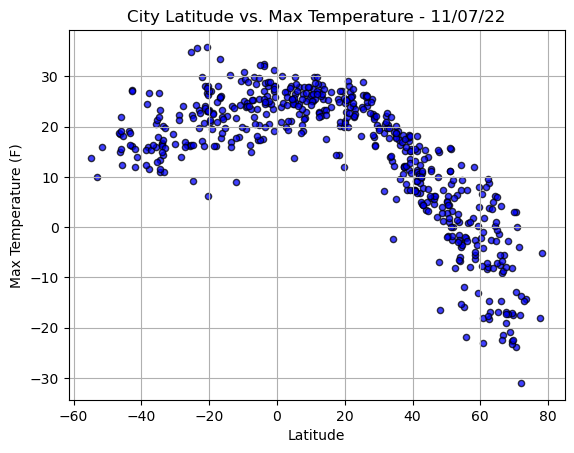

In [61]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature - 11/07/22')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig('output_data/Max_Temp_vs_Lat.png')

plt.show()

#### Latitude Vs. Humidity

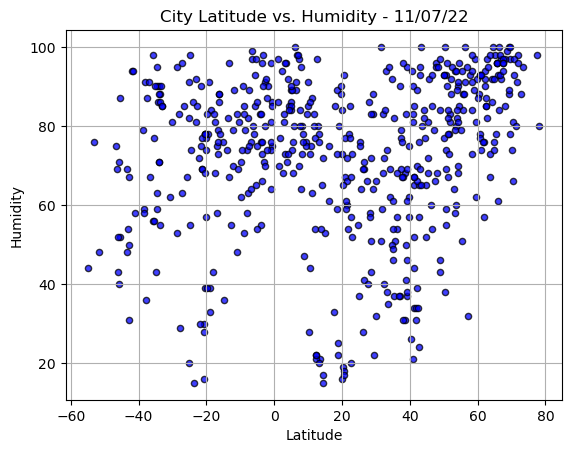

In [62]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Humidity - 11/07/22')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig('output_data/Max_Temp_vs_Lat.png')

plt.show()

#### Latitude Vs. Cloudiness

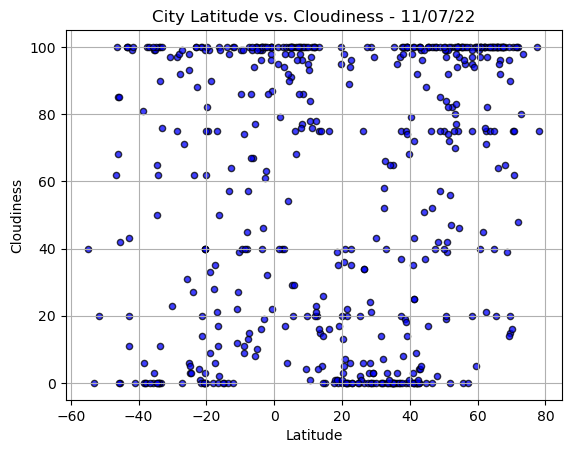

In [63]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Cloudiness - 11/07/22')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig('output_data/Max_Temp_vs_Lat.png')

plt.show()

#### Latitude vs. Wind Speed Plot

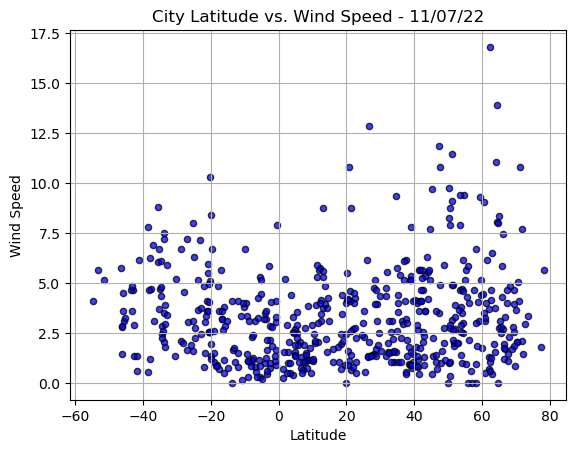

In [64]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Wind Speed - 11/07/22')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid()

# Save the figure.
plt.savefig('output_data/Max_Temp_vs_Lat.png')

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [112]:
# Define a function to create Linear Regression plots
from scipy import stats
def plot_linear_regression(x_list, y_list, x_title, y_title):
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(x_list, y_list)
    pe_fit = pe_slope * x_list + pe_int
    line_eq = f"y = {round(pe_slope,2)} x + {round(pe_int, 2)}"
    # Create scatter plot for Lat vs Max Temp.
    plt.scatter(x_list, y_list, marker='o', s=20, c='b', edgecolors='black', alpha=.75)
    plt.plot(x_list,pe_fit,"r-")
#     plt.annotate(line_eq, (0,50), fontsize=15, color="red")
    # Format axis/labels.
    plt.title(f'{x_title} vs. {y_title} - 11/07/22')
    plt.ylabel(f'{y_title}')
    plt.xlabel(f'{x_title}')
    plt.grid()

    # Save the figure.
    plt.savefig(f'output_data/{x_title}_vs_{y_title}.png')

    plt.show()

In [113]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thompson,55.7435,-97.8558,-21.91,84,0,0.00,CA,1667875630
4,la ronge,55.1001,-105.2842,-11.86,79,100,5.14,CA,1667876083
6,bathsheba,13.2167,-59.5167,28.34,78,75,8.75,BB,1667876084
9,vardo,70.3705,31.1107,2.99,81,100,2.06,NO,1667875860
12,zhigansk,66.7697,123.3711,-21.44,92,100,3.28,RU,1667876086


In [114]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sola,-13.8833,167.5500,30.37,74,100,0.00,VU,1667876082
1,tiarei,-17.5333,-149.3333,28.01,81,6,3.62,PF,1667876082
3,mataura,-46.1927,168.8643,18.60,43,85,1.45,NZ,1667875702
5,port elizabeth,-33.9180,25.5701,16.84,90,0,7.20,ZA,1667875519
7,rikitea,-23.1203,-134.9692,23.23,92,100,7.16,PF,1667875680


###  Temperature vs. Latitude Linear Regression Plot

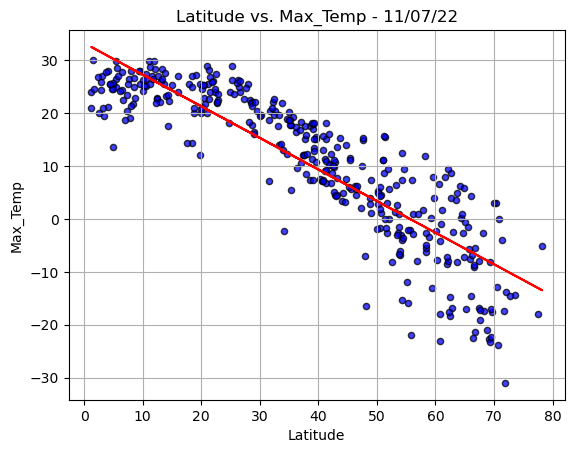

In [115]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max_Temp")

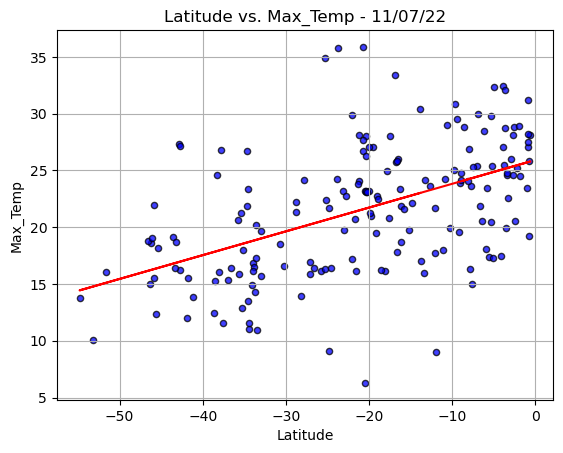

In [116]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max_Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

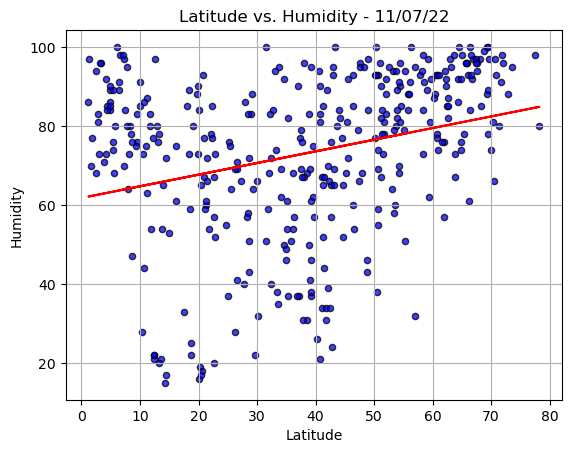

In [117]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

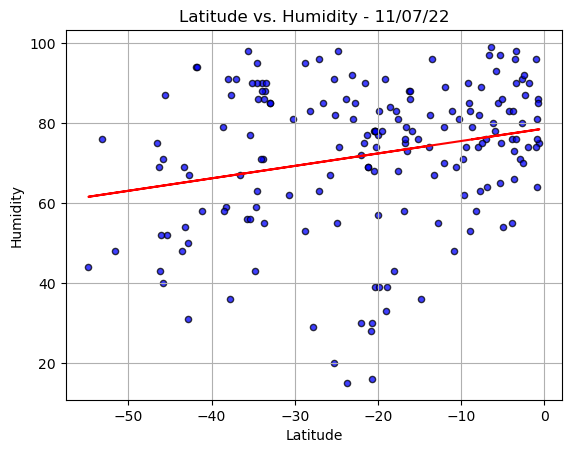

In [118]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

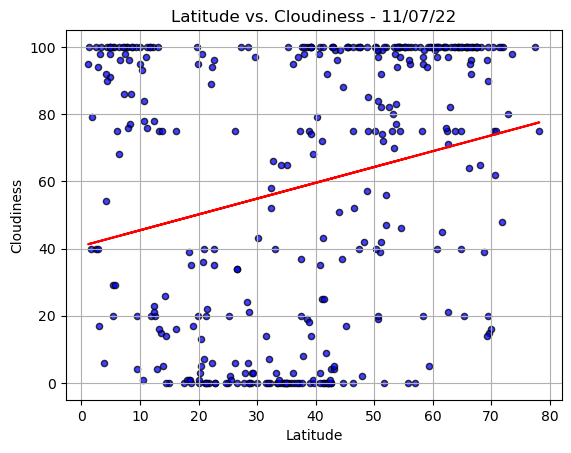

In [119]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

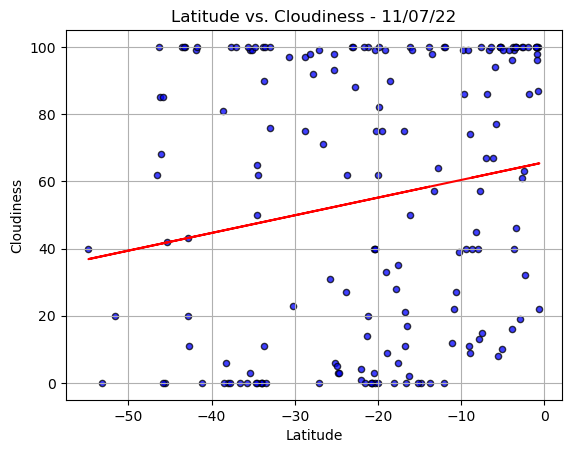

In [120]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

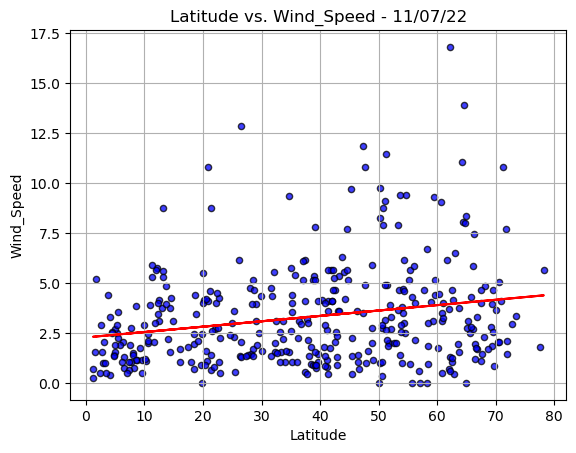

In [121]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind_Speed")

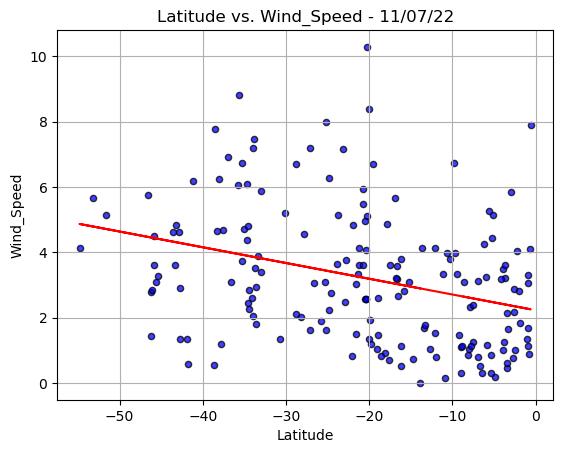

In [123]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind_Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE